<a href="https://colab.research.google.com/github/archanasingh-ml/ml_experiments/blob/main/Heart_Disese_Detection_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Toolbox for Generating Statistics Report
!pip install -q yellowbrick                   # Toolbox for Measuring Machine Performance

     |████████████████████████████████| 69 kB 4.7 MB/s 


In [3]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

     |████████████████████████████████| 261 kB 9.1 MB/s 
     |████████████████████████████████| 10.9 MB 31.0 MB/s 
     |████████████████████████████████| 303 kB 52.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 690 kB 49.3 MB/s 
     |████████████████████████████████| 3.1 MB 58.8 MB/s 
     |████████████████████████████████| 102 kB 13.2 MB/s 
     |████████████████████████████████| 596 kB 49.5 MB/s 
     |████████████████████████████████| 812 kB 47.2 MB/s 
     |████████████████████████████████| 38.1 MB 303 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [63]:
# For Panel Data Analysis
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np

# For Random seed values
from random import randint

# For Scientifc Python
from scipy import stats

# For datetime
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Feature Importances
from yellowbrick.model_selection import FeatureImportances

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

In [64]:
data=pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [65]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [66]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [67]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Observations**


*   On average there are patients of age 54 approx.
*   25% of patients have age <= to 47 while 50% and 75% of patients have age <= to 54 and 60 respectively.



*   On average patients have resting blood pressure of 132.39 mmHg.
*   25% of patients have resting blood presuure <= 120 mmHg while 50% and 75% of patients have resting blood pressure of <= 130 mmHg and <= 140 mmHg respectively.



*   On average patients have cholesterol of 198.79 mg/dl.
*   25% of patients have cholesterol <= 173 mg/dl while 50% and 75% of patients have cholesterol <= 223 mg/dl and <= 267 mg/dl respectively.



1.   On average patients have max heart rate achieved at 136.
2.   25% of patients have max heart rate achieved <= 120 bpm while 50% and 75% of patients have max heart rate achieved <= 138 bpm and <= 156 bpm respectively.



*   On average patients have OldPeak of unit value.
*   25% of patients have no OldPeak  while 50% and 75% of patients have OldPeak  <= 0.6 and <= 1.5 respectively.

In [68]:
print(data.ST_Slope.unique())
print(data.RestingECG.unique())
print(data.ChestPainType.unique())
print(data.ExerciseAngina.unique())

['Up' 'Flat' 'Down']
['Normal' 'ST' 'LVH']
['ATA' 'NAP' 'ASY' 'TA']
['N' 'Y']


 **We have only 3 unique values for**
  

1.   ST_Slope
2.   RestingECG



In [69]:
#lets encode the values 
data = pd.get_dummies(data = data, columns = ['ST_Slope','RestingECG','ChestPainType','Sex','ExerciseAngina'])

In [70]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0
1,49,160,180,0,156,1.0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
3,48,138,214,0,108,1.5,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0


In [71]:
#Splitting X,Y
X= data
X= X.drop(labels='HeartDisease',axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,0
1,49,160,180,0,156,1.0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
3,48,138,214,0,108,1.5,0,1,0,0,1,0,1,0,0,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1,0,0,1,1,0


In [72]:
y = data['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [73]:

#Evaluation using LOGISTC REGRESSION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) 

print(model.intercept_)


from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix)

print("calc")

from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

[-0.10347749]
     0    1
0  108   17
1   14  137
calc
Accuracy score for test data using the model without parameter specification: 0.8876811594202898
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       125
           1       0.89      0.91      0.90       151

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



In [74]:
#Evaluation using Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 2019)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) 

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

Training Data Shape: (734, 20) (734,)
Testing Data Shape: (184, 20) (184,)
    0   1
0  63  19
1  21  81
Accuracy score for test data using the model without parameter specification: 0.782608695652174
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        82
           1       0.81      0.79      0.80       102

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



In [75]:
#Evaluation using Random Forest Classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 121,n_estimators = 5,criterion='entropy')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) 

model.score(X_train,y_train)

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix)


from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

    0    1
0  62   14
1   8  100
Accuracy score for test data using the model without parameter specification: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        76
           1       0.88      0.93      0.90       108

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



**The Accuracy score of Logistic Regression & Random Forest is very close, in such a scenario we shuld also keep the simplest alogorith i.e. LOGISTIC REGRESSION**

In [76]:
#LETS' DO SOME PARAMETER SELECTION (FEATURE IMPORTANCE)
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 9
Threshold set by Model: 0.05
Features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Slope_Flat', 'ST_Slope_Up', 'ChestPainType_ASY', 'ExerciseAngina_Y']


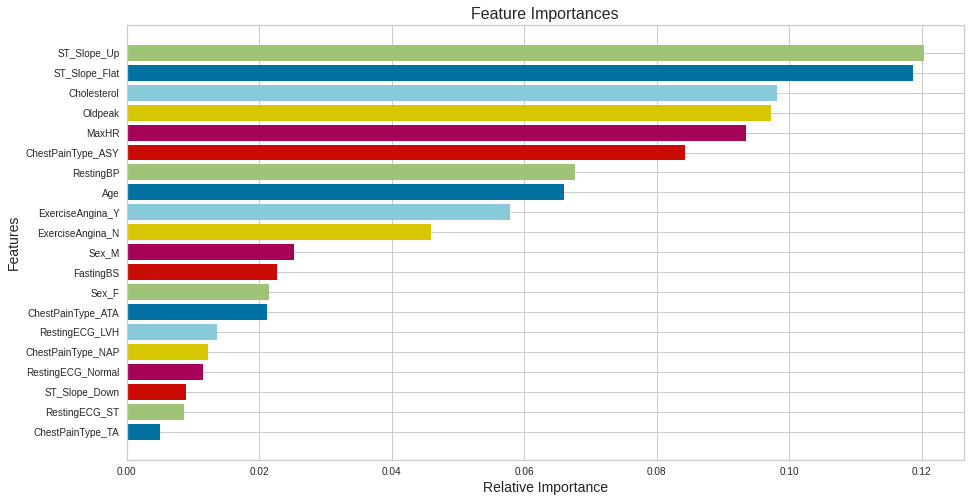

In [77]:
#plotting the features as per their importance
# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [78]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,0
1,49,160,180,0,156,1.0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
3,48,138,214,0,108,1.5,0,1,0,0,1,0,1,0,0,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1,0,0,1,1,0


In [79]:
#Let's take only Important features , till SEX_F as per above chart
X.drop(columns=['ChestPainType_TA','ChestPainType_NAP','ChestPainType_NAP','RestingECG_ST','ST_Slope_Down','RestingECG_Normal','RestingECG_LVH'],inplace=True)

In [80]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,1,0,1,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,1,1,0
3,48,138,214,0,108,1.5,1,0,1,0,1,0,0,1
4,54,150,195,0,122,0.0,0,1,0,0,0,1,1,0


In [81]:
#LOGISTIC REGRESSION WITH IMPORTANT FEATURES
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) 

print(model.intercept_)


from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix)

print("calc")

from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

[-0.17981717]
     0    1
0  111   14
1   15  136
calc
Accuracy score for test data using the model without parameter specification: 0.894927536231884
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       125
           1       0.91      0.90      0.90       151

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.90      0.89      0.89       276



In [82]:
#Evaluation using Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 2019)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) 

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

Training Data Shape: (734, 14) (734,)
Testing Data Shape: (184, 14) (184,)
    0   1
0  62  20
1  17  85
Accuracy score for test data using the model without parameter specification: 0.7989130434782609
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        82
           1       0.81      0.83      0.82       102

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.80       184
weighted avg       0.80      0.80      0.80       184



In [84]:
#Evaluation using Random Forest Classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 121,n_estimators = 5,criterion='entropy')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) 

model.score(X_train,y_train)

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix)


from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

    0   1
0  60  16
1   9  99
Accuracy score for test data using the model without parameter specification: 0.8641304347826086
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        76
           1       0.86      0.92      0.89       108

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



**Conclusions**


After removing some of the features,

*   Logistic regression still performs the same
*   Decision Tree's accuracy score is slightly improved

*   Random Forest Accuracy Score has gone down (slightly)





